# Character Level language model - Dinosaurus Island

In [8]:
import numpy as np
from utils import *
import random
import pprint

## 1 - Problem Statement

### 1.1 - Dataset and Preprocessing

In [9]:
data = open("dinos.txt", "r").read()
data = data.lower()
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print(f'There are {data_size} total characters and {vocab_size} unique characters in your data.')

There are 19909 total characters and 27 unique characters in your data.


`\n` is the 27th character would play a simiar role to the `<EOS>`.

In [10]:
# creating hash maps to figure out what index corresponds to what character in the probability distribution output of the softmax layer.
chars = sorted(chars)
print(chars)

['\n', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [11]:
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(ix_to_char)

{   0: '\n',
    1: 'a',
    2: 'b',
    3: 'c',
    4: 'd',
    5: 'e',
    6: 'f',
    7: 'g',
    8: 'h',
    9: 'i',
    10: 'j',
    11: 'k',
    12: 'l',
    13: 'm',
    14: 'n',
    15: 'o',
    16: 'p',
    17: 'q',
    18: 'r',
    19: 's',
    20: 't',
    21: 'u',
    22: 'v',
    23: 'w',
    24: 'x',
    25: 'y',
    26: 'z'}


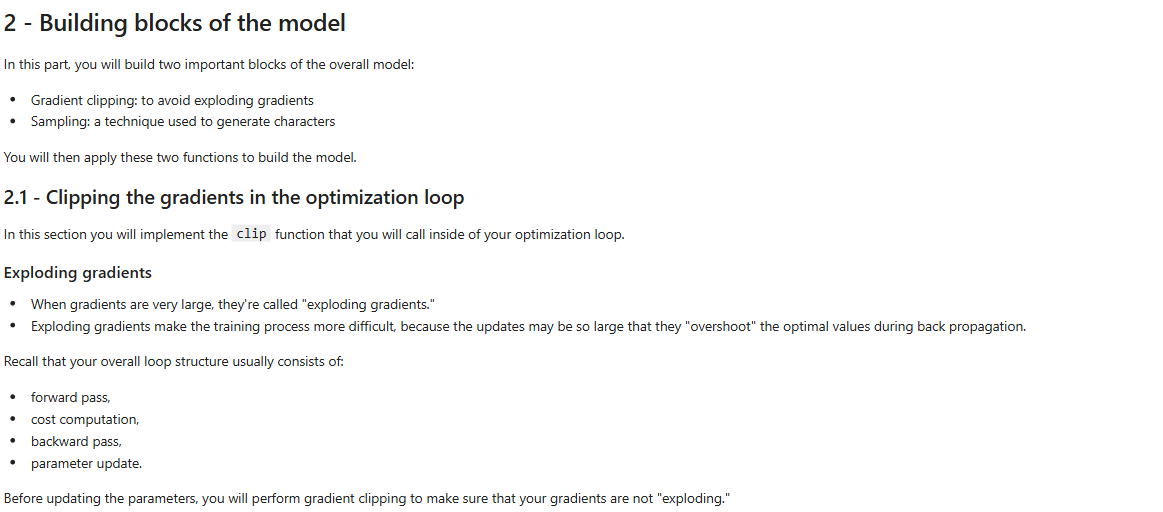


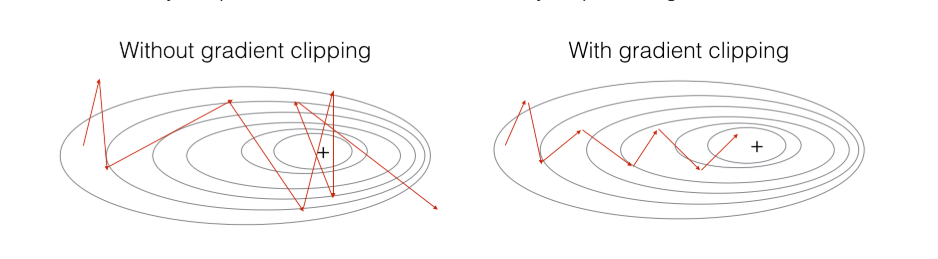


In [14]:
def clip(gradients, maxValue):
    dWaa, dWax, dWya, db, dby = gradients['dWaa'], gradients['dWax'], gradients['dWya'], gradients['db'], gradients['dby']
    for gradient in [dWax, dWaa, dWya, db, dby]:
        np.clip(gradient, -maxValue, maxValue, out=gradient)

    gradients = {'dWaa': dWaa, 'dWax': dWax, 'dWya':dWya, 'db': db, 'dby': dby}
    return gradients

In [15]:
mValue = 10
np.random.seed(1)
dWax = np.random.randn(5, 3)*10
dWaa = np.random.randn(5, 5)*10
dWya = np.random.randn(2, 5)*10
db = np.random.randn(5, 1)*10
dby = np.random.randn(2, 1)*10
gradients = {'dWaa': dWaa, 'dWax': dWax, 'dWya':dWya, 'db': db, 'dby': dby}
gradients = clip(gradients, mValue)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("gradients[\"dWax\"][3][1] =", gradients["dWax"][3][1])
print("gradients[\"dWya\"][1][2] =", gradients["dWya"][1][2])
print("gradients[\"db\"][4] =", gradients["db"][4])
print("gradients[\"dby\"][1] =", gradients["dby"][1])


gradients["dWaa"][1][2] = 9.015907205927956
gradients["dWax"][3][1] = 10.0
gradients["dWya"][1][2] = 10.0
gradients["db"][4] = [-2.08894233]
gradients["dby"][1] = [8.38983414]


In [16]:
# let's check with value of 5
mValue = 5
np.random.seed(3)
dWax = np.random.randn(5, 3)*10
dWaa = np.random.randn(5, 5)*10
dWya = np.random.randn(2, 5)*10
db = np.random.randn(5, 1)*10
dby = np.random.randn(2, 1)*10
gradients = {'dWaa': dWaa, 'dWax': dWax, 'dWya':dWya, 'db': db, 'dby': dby}
gradients = clip(gradients, mValue)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("gradients[\"dWax\"][3][1] =", gradients["dWax"][3][1])
print("gradients[\"dWya\"][1][2] =", gradients["dWya"][1][2])
print("gradients[\"db\"][4] =", gradients["db"][4])
print("gradients[\"dby\"][1] =", gradients["dby"][1])

del mValue


gradients["dWaa"][1][2] = 5.0
gradients["dWax"][3][1] = -5.0
gradients["dWya"][1][2] = 0.2971381536101662
gradients["db"][4] = [5.]
gradients["dby"][1] = [5.]


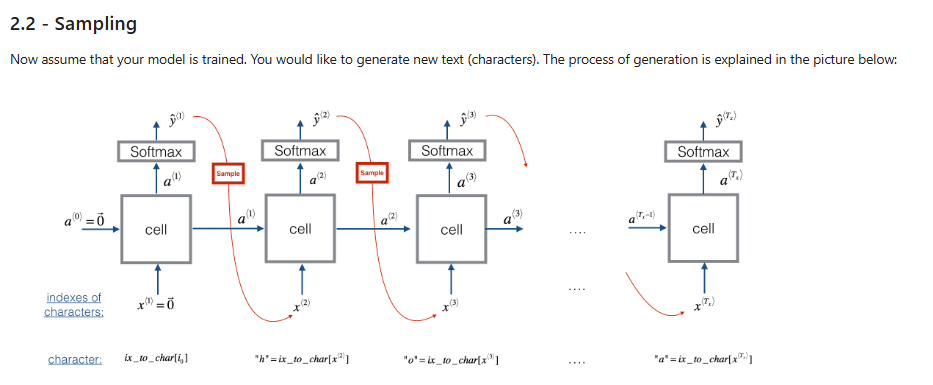

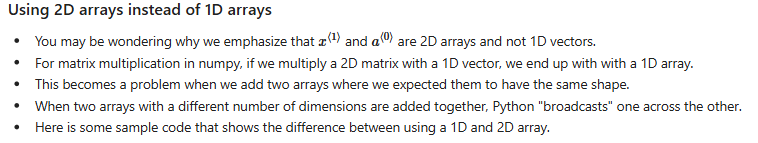

In [17]:
matrix1 = np.array([[1,1],[2,2],[3,3]]) # (3,2)
matrix2 = np.array([[0],[0],[0]]) # (3,1) 
vector1D = np.array([1,1]) # (2,) 
vector2D = np.array([[1],[1]]) # (2,1)
print("matrix1 \n", matrix1,"\n")
print("matrix2 \n", matrix2,"\n")
print("vector1D \n", vector1D,"\n")
print("vector2D \n", vector2D)

matrix1 
 [[1 1]
 [2 2]
 [3 3]] 

matrix2 
 [[0]
 [0]
 [0]] 

vector1D 
 [1 1] 

vector2D 
 [[1]
 [1]]


In [18]:
print("Multiply 2D and 1D arrays: result is a 1D array\n", 
      np.dot(matrix1,vector1D))
print("Multiply 2D and 2D arrays: result is a 2D array\n", 
      np.dot(matrix1,vector2D))

Multiply 2D and 1D arrays: result is a 1D array
 [2 4 6]
Multiply 2D and 2D arrays: result is a 2D array
 [[2]
 [4]
 [6]]


In [19]:
print("Adding (3 x 1) vector to a (3 x 1) vector is a (3 x 1) vector\n",
      "This is what we want here!\n", 
      np.dot(matrix1,vector2D) + matrix2)

Adding (3 x 1) vector to a (3 x 1) vector is a (3 x 1) vector
 This is what we want here!
 [[2]
 [4]
 [6]]


In [20]:
print("Adding a (3,) vector to a (3 x 1) vector\n",
      "broadcasts the 1D array across the second dimension\n",
      "Not what we want here!\n",
      np.dot(matrix1,vector1D) + matrix2
     )

Adding a (3,) vector to a (3 x 1) vector
 broadcasts the 1D array across the second dimension
 Not what we want here!
 [[2 4 6]
 [2 4 6]
 [2 4 6]]


In [21]:
def sample(parameters, chat_to_ix, seed):
    Waa, Wax, Wya, by, b = parameters['Waa'], parameters['Wax'], parameters['Wya'], parameters['by'], parameters['b']
    vocab_size = by.shape[0]
    n_a = Waa.shape[1]
    x = np.zeros((vocab_size, 1)) # one-hot vector
    a_prev = np.zeros((n_a, 1))

    indices = []
    idx = -1

    counter = 0
    newline_character = char_to_ix['\n']

    while(idx != newline_character and counter != 50):
        a = np.tanh(np.dot(Wax, x) + np.dot(Waa, a_prev) + b)
        z = np.dot(Wya, a) + by
        y = softmax(z)

        np.random.seed(counter+seed)

        idx = np.random.choice(range(vocab_size), p = y.ravel())

        indices.append(idx)
        x = np.zeros((vocab_size, 1))
        x[idx] = 1
        a_prev = a
        seed +=1
        counter +=1

        if(counter == 50):
            indices.append(char_to_ix['\n'])
    
    return indices



In [22]:
np.random.seed(2)
_, n_a = 20, 100
Wax, Waa, Wya = np.random.randn(n_a, vocab_size), np.random.randn(n_a, n_a), np.random.randn(vocab_size, n_a)
b, by = np.random.randn(n_a, 1), np.random.randn(vocab_size, 1)
parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "b": b, "by": by}


indices = sample(parameters, char_to_ix, 0)
print("Sampling:")
print("list of sampled indices:\n", indices)
print("list of sampled characters:\n", [ix_to_char[i] for i in indices])

Sampling:
list of sampled indices:
 [np.int64(12), np.int64(17), np.int64(24), np.int64(14), np.int64(13), np.int64(9), np.int64(10), np.int64(22), np.int64(24), np.int64(6), np.int64(13), np.int64(11), np.int64(12), np.int64(6), np.int64(21), np.int64(15), np.int64(21), np.int64(14), np.int64(3), np.int64(2), np.int64(1), np.int64(21), np.int64(18), np.int64(24), np.int64(7), np.int64(25), np.int64(6), np.int64(25), np.int64(18), np.int64(10), np.int64(16), np.int64(2), np.int64(3), np.int64(8), np.int64(15), np.int64(12), np.int64(11), np.int64(7), np.int64(1), np.int64(12), np.int64(10), np.int64(2), np.int64(7), np.int64(3), np.int64(11), np.int64(2), np.int64(6), np.int64(12), np.int64(13), np.int64(15), 0]
list of sampled characters:
 ['l', 'q', 'x', 'n', 'm', 'i', 'j', 'v', 'x', 'f', 'm', 'k', 'l', 'f', 'u', 'o', 'u', 'n', 'c', 'b', 'a', 'u', 'r', 'x', 'g', 'y', 'f', 'y', 'r', 'j', 'p', 'b', 'c', 'h', 'o', 'l', 'k', 'g', 'a', 'l', 'j', 'b', 'g', 'c', 'k', 'b', 'f', 'l', 'm', 'o'

## 3. Building the language model

In [23]:
# using gradient descent
def optimize(X, Y, a_prev, parameters, learning_rate = 0.01):
    loss, cache = rnn_forward(X, Y, a_prev, parameters)
    gradients, a = rnn_backward(X, Y, parameters, cache)
    gradients = clip(gradients, 5)
    parameters = update_parameters(parameters, gradients, learning_rate)

    return loss, gradients, a[len(X) - 1]

In [24]:
np.random.seed(1)
vocab_size, n_a = 27, 100
a_prev = np.random.randn(n_a, 1)
Wax, Waa, Wya = np.random.randn(n_a, vocab_size), np.random.randn(n_a, n_a), np.random.randn(vocab_size, n_a)
b, by = np.random.randn(n_a, 1), np.random.randn(vocab_size, 1)
parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "b": b, "by": by}
X = [12,3,5,11,22,3]
Y = [4,14,11,22,25, 26]

loss, gradients, a_last = optimize(X, Y, a_prev, parameters, learning_rate = 0.01)
print("Loss =", loss)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("np.argmax(gradients[\"dWax\"]) =", np.argmax(gradients["dWax"]))
print("gradients[\"dWya\"][1][2] =", gradients["dWya"][1][2])
print("gradients[\"db\"][4] =", gradients["db"][4])
print("gradients[\"dby\"][1] =", gradients["dby"][1])
print("a_last[4] =", a_last[4])

Loss = 126.50397572165383
gradients["dWaa"][1][2] = 0.1947093153471555
np.argmax(gradients["dWax"]) = 93
gradients["dWya"][1][2] = -0.007773876032002889
gradients["db"][4] = [-0.06809825]
gradients["dby"][1] = [0.01538192]
a_last[4] = [-1.]


### 3.2 Training the model

In [25]:
def model(data, ix_to_char, char_to_ix, num_iterations=35000, n_a=50, dino_names=7, vocab_size = 27, verbose=False):
    n_x, n_y = vocab_size, vocab_size
    parameters = initialize_parameters(n_a, n_x, n_y)
    loss = get_initial_loss(vocab_size, dino_names)

    with open('dinos.txt') as f:
        examples = f.readlines()
    examples = [x.lower().strip() for x in examples]

    np.random.seed(0)
    np.random.shuffle(examples)

    a_prev = np.zeros((n_a, 1))

    for j in range(num_iterations):
        idx = j % len(examples)
        single_example = idx
        single_example_chars = [kkp for kkp in examples[idx]]
        single_example_ix = [char_to_ix[kkp] for kkp in single_example_chars]
        X = [None] + single_example_ix

        ix_newline = char_to_ix['\n']
        Y = X[1:] + [ix_newline]

        curr_loss, gradients, a_prev = optimize(X, Y, a_prev, parameters, learning_rate=0.01)

        if verbose and j in [0, len(examples) -1, len(examples)]:
            print("j =", j, "idx = ", idx)
        if verbose and j in [0]:
            print("single_example =", single_example)
            print("single_example_chars", single_example_chars)
            print("single_example_ix", single_example_ix)
            print(" X = ", X, "\n", "Y =       ", Y, "\n")
        loss = smooth(loss, curr_loss)

        if j % 2000 == 0:
            print('Iteration: %d, Loss: %f' % (j, loss) + '\n')
            
            # The number of dinosaur names to print
            seed = 0
            for name in range(dino_names):
                
                # Sample indices and print them
                sampled_indices = sample(parameters, char_to_ix, seed)
                print_sample(sampled_indices, ix_to_char)
                
                seed += 1  # To get the same result (for grading purposes), increment the seed by one. 
      
            print('\n')
        
    return parameters
        

In [26]:
parameters = model(data, ix_to_char, char_to_ix, verbose = True)


j = 0 idx =  0
single_example = 0
single_example_chars ['t', 'u', 'r', 'i', 'a', 's', 'a', 'u', 'r', 'u', 's']
single_example_ix [20, 21, 18, 9, 1, 19, 1, 21, 18, 21, 19]
 X =  [None, 20, 21, 18, 9, 1, 19, 1, 21, 18, 21, 19] 
 Y =        [20, 21, 18, 9, 1, 19, 1, 21, 18, 21, 19, 0] 

Iteration: 0, Loss: 23.087336

Nkzxwtdmfqoeyhsqwasjkjvu
Kneb
Kzxwtdmfqoeyhsqwasjkjvu
Neb
Zxwtdmfqoeyhsqwasjkjvu
Eb
Xwtdmfqoeyhsqwasjkjvu


j = 1535 idx =  1535
j = 1536 idx =  0
Iteration: 2000, Loss: 27.884160

Liusskeomnolxeros
Hmdaairus
Hytroligoraurus
Lecalosapaus
Xusicikoraurus
Abalpsamantisaurus
Tpraneronxeros


Iteration: 4000, Loss: 25.901815

Mivrosaurus
Inee
Ivtroplisaurus
Mbaaisaurus
Wusichisaurus
Cabaselachus
Toraperlethosdarenitochusthiamamumamaon


Iteration: 6000, Loss: 24.608779

Onwusceomosaurus
Lieeaerosaurus
Lxussaurus
Oma
Xusteonosaurus
Eeahosaurus
Toreonosaurus


Iteration: 8000, Loss: 24.070350

Onxusichepriuon
Kilabersaurus
Lutrodon
Omaaerosaurus
Xutrcheps
Edaksoje
Trodiktonus


Iter

### Conclusion: 

- and hence it started to generate some names that can be referred to a those saures. (though it was trained on a very small dataset).

## 4. Writing like Shakespeare

#### Import packages

In [30]:
from __future__ import print_function
import sys
import io

from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking , LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import get_file

from shakespeare_utils import *

Loading text data...
Creating training set...
number of training examples: 31412
Vectorizing training set...
Loading model...


> can't run any epochs as keras compatibility issues are there in loading weights or parameters values so `compile=False` is set in `shakespeare_utils.py` file.

In [ ]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
model.fit(x, y, batch_size=128, epochs=1, callbacks=[print_callback])

In [36]:
generate_output()



Here is your poem: 

cqeoce.
bains that love hath me the place,
and frace should of the beting pies,
and but my mint of thy whith for my sell,
and ar this will of my love,
and that part my must, and behing spill.



but best thou have of the wrots as off all,
ald their baten and varked my wast of thee;
that i have your leave, for that live?
and didt that all fill my that my ross,
that doth my self of well that wire hi

> The RNN-Shakespeare model is very similar to the one you have built for dinosaur names. The only major differences are:

- LSTMs instead of the basic RNN to capture longer-range dependencies
- The model is a deeper, stacked LSTM model (2 layer)
- Using Keras instead of python to simplify the code

## References:

[Karpathy's Implementation](https://gist.github.com/karpathy/d4dee566867f8291f086)

# Finish.